In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Data we want to fit
X = np.array(range(7))
y = np.array([2,4,6,8,10,11,12])

In [ ]:
#hypothesis function
def h(x):
    return m*x+b

#defines the loss function
def loss(y, yhat, loss_array):
    loss_array.append(np.sum((yhat-y)**2))

#plots the loss at the end of training
def plot_loss(loss_array, epochs, learning_rate):
    plt.plot(loss_array)
    plt.ylabel('Loss', fontsize=18)
    plt.xlabel('Epochs', fontsize=18)
    plt.xlim(0,epochs)
    plt.ylim(0,26)
    plt.title(f"Learning Rate: {lr}")

#gets the r^2 value
def get_r_squared(y, yhat):
  #convert to numpy array
  y = np.array(y)
  yhat = np.array(yhat)

  mean = np.sum(y) / len(y)
  mean_squared_error = np.sum((mean-y)**2)

  squared_error = np.sum((yhat - y)**2)
  r_squared = 1 - (squared_error / mean_squared_error)
  r_squared = np.round(r_squared,3)
  return r_squared

In [ ]:
lr = 0.01 # The learning Rate
epochs = 1000 #amount of epochs of gradient descent
loss_array = [] #loss array to plot at the end

m = 0 #inital m value
b = 0 #inital b value
for _ in range(epochs):
    prediction = h(X) #start out with the predicted value
    #next compute gradients
    djdm = 2 * np.sum((prediction - y)*X)
    djdb = 2 * np.sum(prediction - y)

    #then we perform the descent
    m = m - lr*djdm
    b = b - lr*djdb
    loss(y, prediction, loss_array)

print(f"Final Line: y = {m}x + {b}")
print(f"Loss: {loss_array[len(loss_array) - 1]}")

Final Line: y = 1.7142857142857146x + 2.428571428571427
Loss: 1.4285714285714304


Text(0.5, 1.0, 'Fit with y = 1.7142857142857146x + 2.428571428571427, r^2 = 0.983')

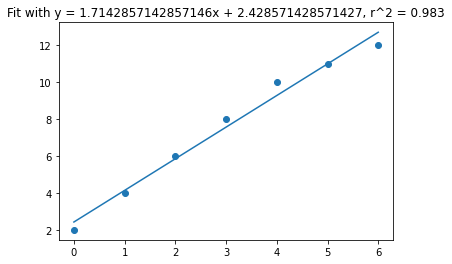

In [ ]:
#plot the final line
plt.scatter(X,y)
yhat = X*m +b
plt.plot(yhat)

plt.title(f"Fit with y = {m}x + {b}, r^2 = {get_r_squared(y,yhat)}")

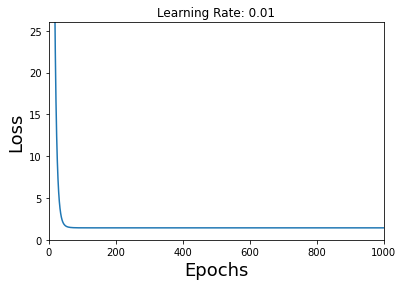

In [27]:
#plot the loss during gradient descent
plot_loss(loss_array, epochs, lr)